In [1]:
import pandas as pd
df = pd.read_csv('penguins.csv')
print(df.head())

   CulmenLength  CulmenDepth  FlipperLength  BodyMass  Species
0          39.1         18.7          181.0    3750.0        0
1          39.5         17.4          186.0    3800.0        0
2          40.3         18.0          195.0    3250.0        0
3           NaN          NaN            NaN       NaN        0
4          36.7         19.3          193.0    3450.0        0


In [2]:
df.fillna(df.median(numeric_only=True), inplace=True)


In [3]:
print(df.isnull().sum())


CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64


In [4]:
# Podstawowe statystyki opisowe
print(df.describe())


       CulmenLength  CulmenDepth  FlipperLength     BodyMass     Species
count    344.000000   344.000000     344.000000   344.000000  344.000000
mean      43.925000    17.152035     200.892442  4200.872093    0.755814
std        5.443792     1.969060      14.023826   799.696532    0.762626
min       32.100000    13.100000     172.000000  2700.000000    0.000000
25%       39.275000    15.600000     190.000000  3550.000000    0.000000
50%       44.450000    17.300000     197.000000  4050.000000    1.000000
75%       48.500000    18.700000     213.000000  4750.000000    1.000000
max       59.600000    21.500000     231.000000  6300.000000    2.000000


In [5]:
# Rozkład liczby próbek dla każdego gatunku
print(df['Species'].value_counts())


Species
0    152
1    124
2     68
Name: count, dtype: int64


In [6]:
# Korelacje między cechami
print(df.corr())


               CulmenLength  CulmenDepth  FlipperLength  BodyMass   Species
CulmenLength       1.000000    -0.235000       0.655858  0.594925  0.778411
CulmenDepth       -0.235000     1.000000      -0.583832 -0.471942 -0.182945
FlipperLength      0.655858    -0.583832       1.000000  0.871221  0.357371
BodyMass           0.594925    -0.471942       0.871221  1.000000  0.209734
Species            0.778411    -0.182945       0.357371  0.209734  1.000000


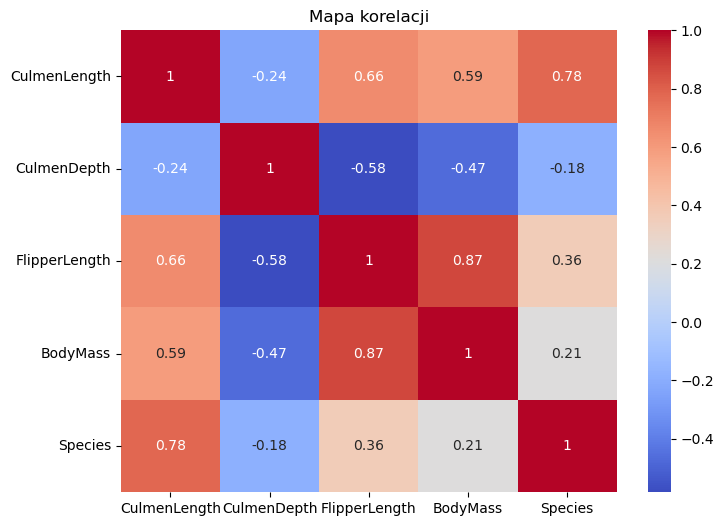

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelacje wizualizacja
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa korelacji')
plt.show()


Patrząc na tę mapę korelacji, można wyciągnąć następujące wnioski:
Najsilniejsza korelacja cech liczbowych:
    *FlipperLength i BodyMass mają bardzo wysoką dodatnią korelację (0.87). To oznacza, że większa masa ciała pingwinów często wiąże się z dłuższymi płetwami.
     *Korelacja cech z gatunkami (Species):
CulmenLength wykazuje silną dodatnią korelację z gatunkami (0.78). Oznacza to, że długość dzioba jest jednym z najbardziej informacyjnych parametrów w klasyfikacji gatunków.
*FlipperLength wykazuje umiarkowaną dodatnią korelację z gatunkami (0.36), co sugeruje, że długość płetwy ma również pewne znaczenie przy różnicowaniu gatunków.
CulmenDepth ma najsłabszą korelację z gatunkami (-0.18), co wskazuje, że głębokość dzioba jest mniej istotna w klasyfikacji.

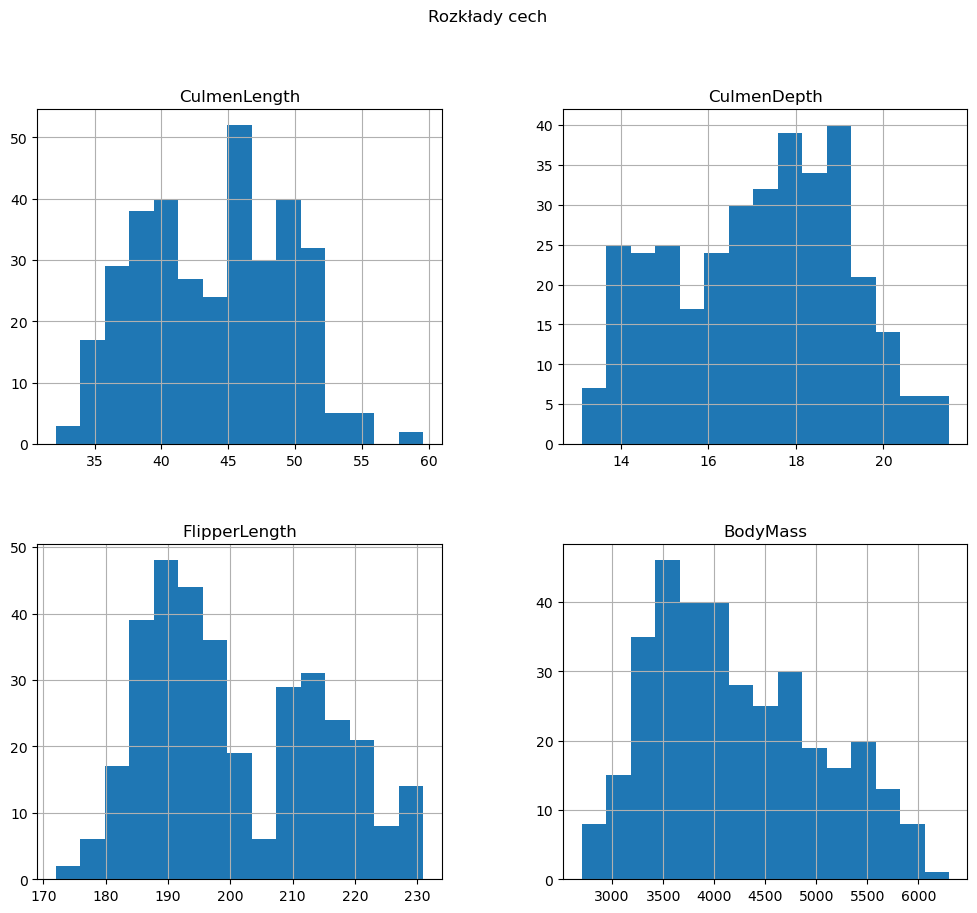

In [9]:
# Rozkłady cech
df[['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']].hist(bins=15, figsize=(12, 10))
plt.suptitle('Rozkłady cech')
plt.show()

Rozkłady cech zostały przedstawione na histogramach. Na ich podstawie można zauważyć:
1.CulmenLength (Długość dzioba): Rozkład wygląda na dwumodalny lub wielomodalny, co może wskazywać na różnice między gatunkami.
2.CulmenDepth (Głębokość dzioba): Rozkład jest bardziej jednorodny, z większym zagęszczeniem wokół wartości średnich.
3.FlipperLength (Długość płetw): Rozkład jest bardziej rozciągnięty, wskazując na większe różnice między pingwinami.
4.BodyMass (Masa ciała): Rozkład ma lekko prawoskośny kształt, co może wymagać ewentualnego przekształcenia, aby poprawić działanie modeli.

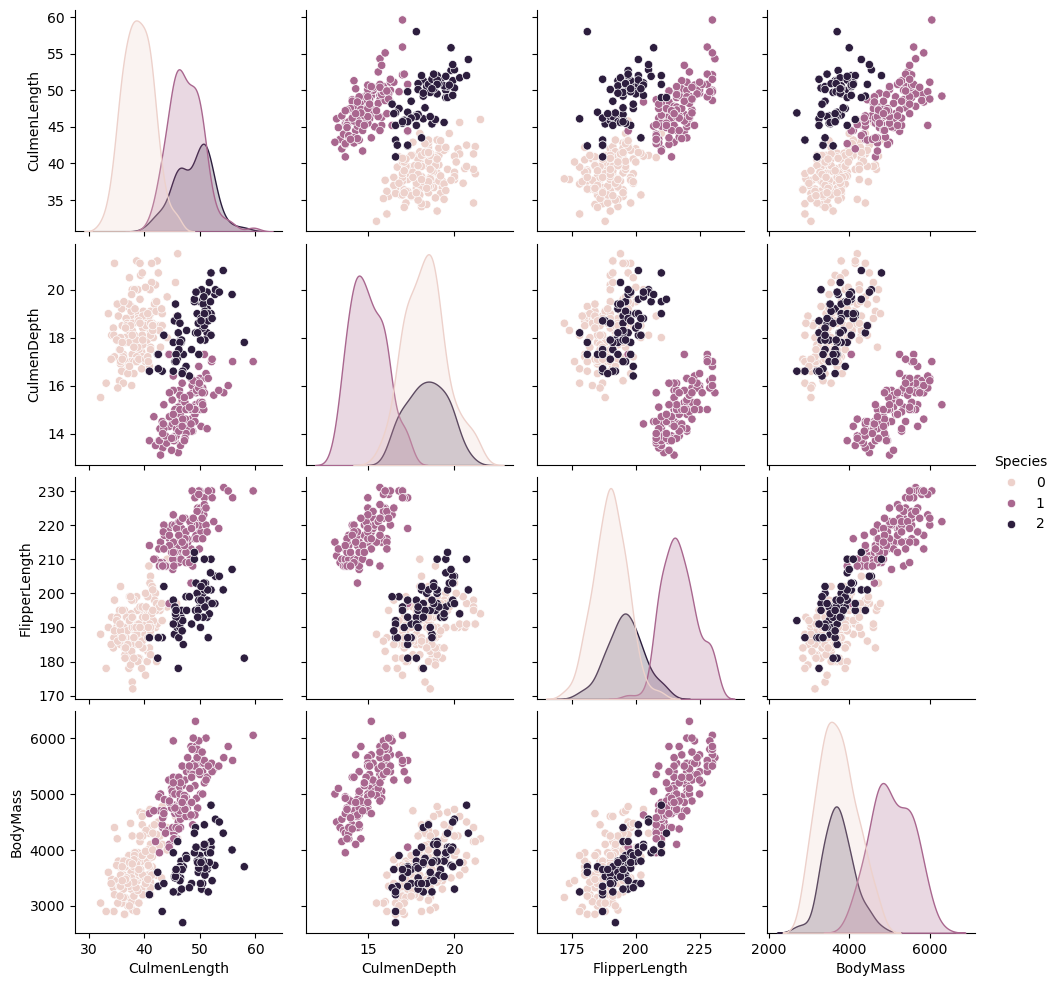

In [11]:
# Wizualizacja rozkładów cech w podziale na gatunki
sns.pairplot(df, hue='Species', diag_kind='kde')
plt.show()


Wnioski : Gatunki są dobrze separowalne w przestrzeni cech, co tłumaczy wysokie wyniki klasyfikacji osiągnięte przez różne modele.
Najbardziej informacyjne cechy:
CulmenLength i FlipperLength wydają się kluczowe w rozróżnianiu gatunków, ponieważ dobrze oddzielają grupy na wykresach.


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']]
y = df['Species']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((275, 4), (69, 4), (275,), (69,))

Uczymy modele 

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Model KNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)  # Używamy skalowanych danych
y_pred_knn = knn.predict(X_test_scaled)  # Używamy skalowanych danych

# Ocena KNN
print("KNN:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      1.00      1.00        25
           2       1.00      0.93      0.96        14

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69

Accuracy: 0.9855072463768116


In [16]:
from sklearn.ensemble import RandomForestClassifier

# Model Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Ocena Random Forest
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))



Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.96      1.00      0.98        25
           2       1.00      0.93      0.96        14

    accuracy                           0.97        69
   macro avg       0.98      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69

Accuracy: 0.9710144927536232


In [17]:
from sklearn.linear_model import LogisticRegression

# Model Logistic Regression
lr = LogisticRegression(max_iter=5000)  # Zwiększenie max_iter
lr.fit(X_train_scaled, y_train)  # Użycie skalowanych danych
y_pred_lr = lr.predict(X_test_scaled)  # Użycie skalowanych danych

# Ocena Logistic Regression
print("\nLogistic Regression:")
print(classification_report(y_test, y_pred_lr, zero_division=0))  # Dodanie zero_division=0
print("Accuracy:", accuracy_score(y_test, y_pred_lr))



Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        14

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

Accuracy: 1.0


In [18]:
from sklearn.ensemble import AdaBoostClassifier

# Model AdaBoost
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train, y_train)
y_pred_ab = ab.predict(X_test)

# Ocena AdaBoost
print("\nAdaBoost (SAMME):")
print(classification_report(y_test, y_pred_ab))
print("Accuracy:", accuracy_score(y_test, y_pred_ab))



AdaBoost (SAMME):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      1.00      1.00        25
           2       1.00      0.93      0.96        14

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69

Accuracy: 0.9855072463768116


In [19]:
from sklearn.svm import SVC

# Model SVM
svm = SVC(random_state=42, probability=True)
svm.fit(X_train_scaled, y_train)  # Skalowane dane
y_pred_svm = svm.predict(X_test_scaled)  # Skalowane dane

# Ocena SVM
print("\nSVM:")
print(classification_report(y_test, y_pred_svm, zero_division=0))  # Dodano zero_division=0
print("Accuracy:", accuracy_score(y_test, y_pred_svm))



SVM:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       1.00      1.00      1.00        25
           2       0.93      0.93      0.93        14

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69

Accuracy: 0.9710144927536232


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, 
    f1_score, roc_auc_score
)

metrics_dataframe = pd.DataFrame(columns=['Model', 'F1_score', 'AUC'])
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    

    if hasattr(model, "predict_proba"):
        predictions_proba = model.predict_proba(X_checked)
        predictions_proba_list.append(predictions_proba)
    else:
        predictions_proba = None

    
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_checked, predictions))
    
    # Confusion matrix
    cm = confusion_matrix(y_checked, predictions)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()
    
    
    f1_metric = f1_score(y_checked, predictions, average="weighted")
    
    
    if predictions_proba is not None:
        auc_metric = roc_auc_score(
            y_checked, predictions_proba, multi_class="ovr", average="weighted"
        )
    else:
        auc_metric = None
    
    
    new_row = pd.DataFrame({'Model': [name], 'F1_score': [f1_metric], 'AUC': [auc_metric]})
    if not metrics_dataframe.empty:
        metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)
    else:
        metrics_dataframe = new_row
    
    
    if predictions_proba is not None:
        for i in range(predictions_proba.shape[1]): 
            fpr, tpr, _ = roc_curve(y_checked, predictions_proba[:, i], pos_label=i)
            plt.plot(fpr, tpr, label=f"Class {i}")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f"{name} ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.show()
    
    return metrics_dataframe



KNN Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      1.00      1.00        25
           2       1.00      0.93      0.96        14

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69



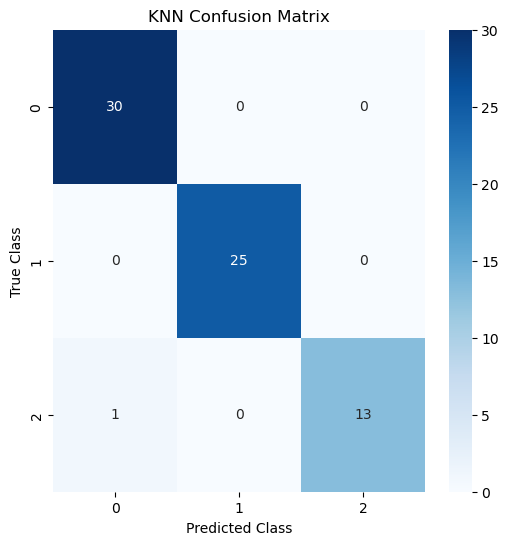

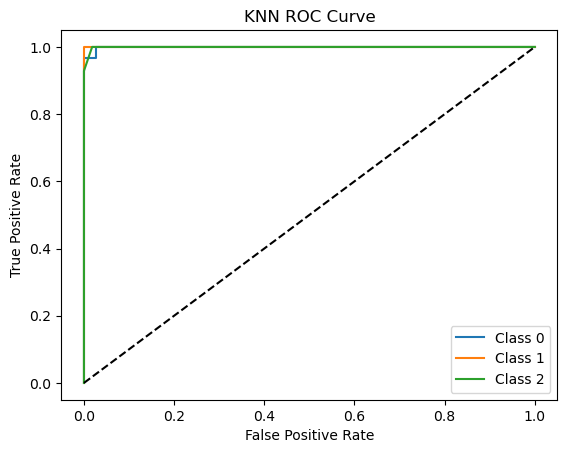


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.96      1.00      0.98        25
           2       1.00      0.93      0.96        14

    accuracy                           0.97        69
   macro avg       0.98      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



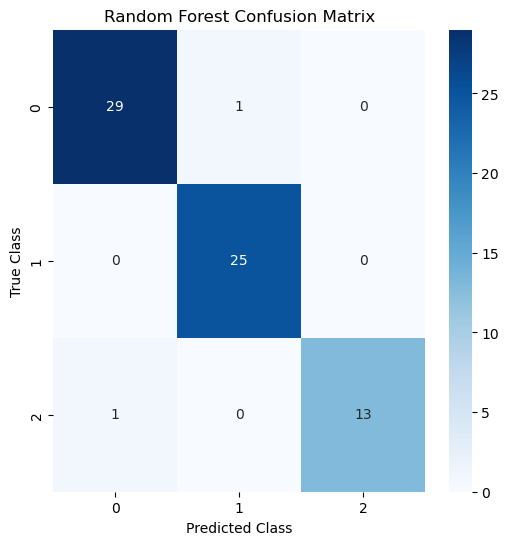

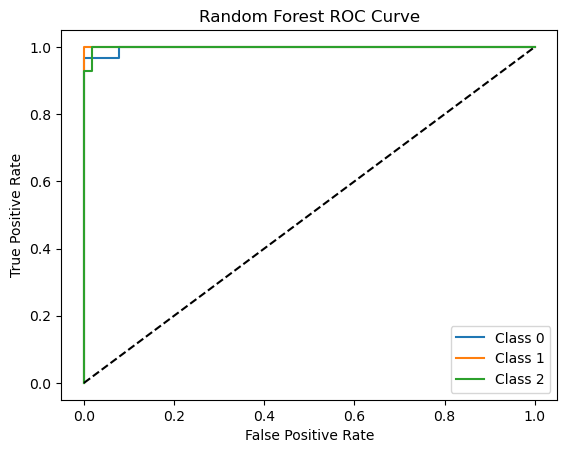


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        14

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



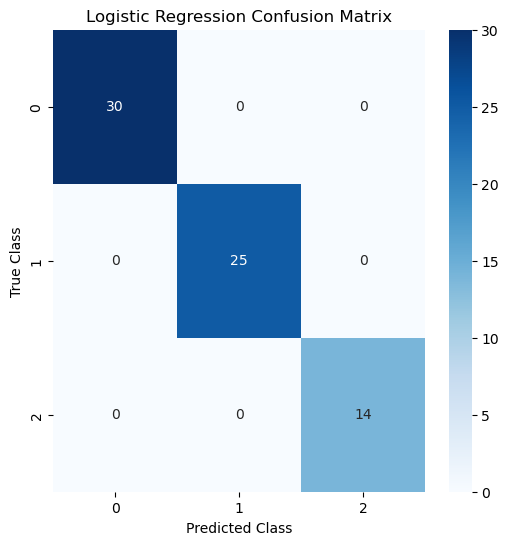

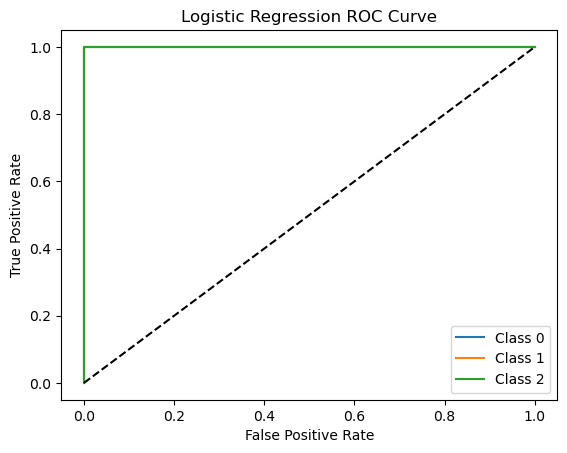


AdaBoost Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      1.00      1.00        25
           2       1.00      0.93      0.96        14

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69



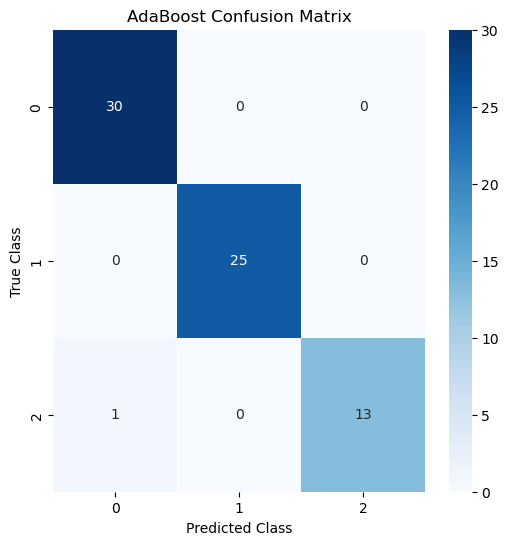

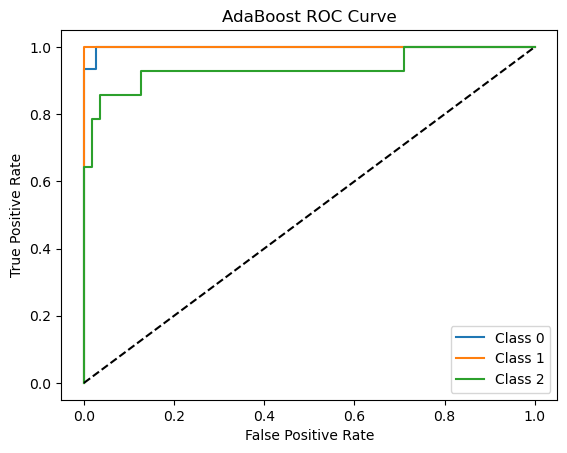


SVM Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       1.00      1.00      1.00        25
           2       0.93      0.93      0.93        14

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



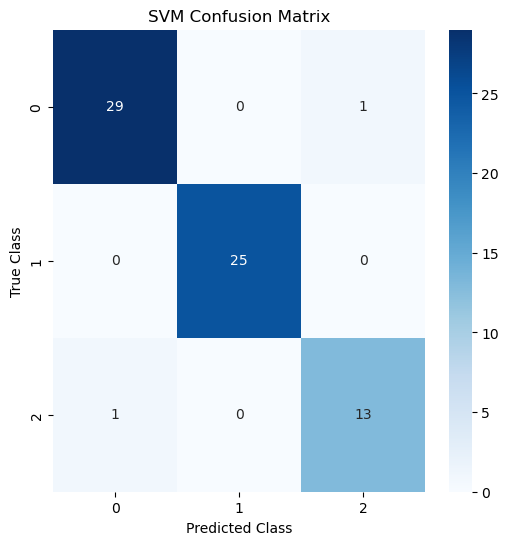

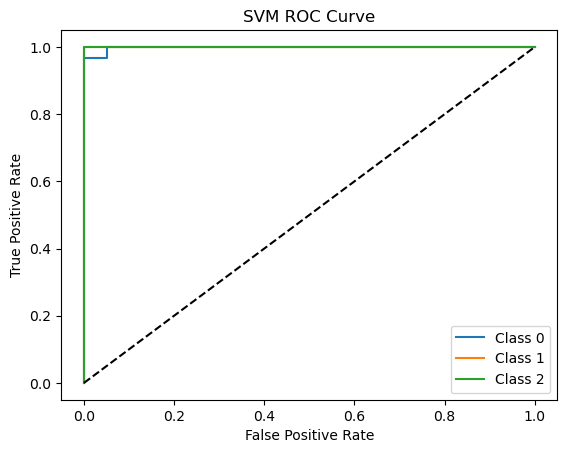

In [21]:
# Obliczanie metryk dla KNN
metrics_dataframe = calculate_metrics(knn, "KNN", X_test_scaled, y_test)

# Obliczanie metryk dla Random Forest
metrics_dataframe = calculate_metrics(rf, "Random Forest", X_test, y_test)

# Obliczanie metryk dla Logistic Regression
metrics_dataframe = calculate_metrics(lr, "Logistic Regression", X_test_scaled, y_test)

# Obliczanie metryk dla AdaBoost
metrics_dataframe = calculate_metrics(ab, "AdaBoost", X_test, y_test)

# Obliczanie metryk dla SVM
metrics_dataframe = calculate_metrics(svm, "SVM", X_test_scaled, y_test)


In [22]:
print(metrics_dataframe)


                 Model  F1_score       AUC
0                  KNN  0.985358  0.999497
1        Random Forest  0.970888  0.998622
2  Logistic Regression  1.000000  1.000000
3             AdaBoost  0.985358  0.986082
4                  SVM  0.971014  0.999257


WNIOSKI:
1. Ogólna skuteczność modeli:
  Większość modeli osiąga bardzo wysokie wartości F1-score (bliskie 1), co oznacza, że dobrze radzą sobie z klasyfikacją wieloklasową na danych testowych.

2. Najlepszy model:Logistic Regression osiągnęła idealne wyniki (F1-Score: 1.000, AUC: 1.000), co wskazuje, że jest to najlepiej dopasowany model dla te
   go zbioru dan.
  l3

3. Bardzo dobre wydaBooAdaBoost osiągnął bardzo dobre wyniki, z F1-Score równym 0.985 i AUC 0.986, co świadczy o skuteczności tego modelu. modebe wynikKNN osiągnął bardzo wysokie wyniki (F1-Score: 0.985, AUC: 0.999), co świadczy o jego skuteczności w tej konfigur

4. KNN:
   KNN osiągnął bardzo wysokie wyniki (F1-Score: 0.985, AUC: 0.999), co świadczy o jego skuteczności w tej konfiguracji.ac5i.m F    Random i SVM:
    Random Forest: F1-Score 0.970, AUC 0.998 – bardzo skuteczny i wszechstronny model.
SVM: F1-Score 0.971, AUC 0.999 – model radzi sobie bardzo dobrze, ustępując jedynie Logistic Regression.eo6es

6. PoRóżn:
   Różnice w AUC ce w AUC między Logistic Regression (1.000) a pozostałymi modelami (AdaBoost, SVM, KNN, Random Forest) są minimalne, co świadczy o bardzo wysokiej jakości predykcji dla większości modeli. Wcześniejsze błędne założenia wynikały z nieprecyzyjnego porównania metryk. Wszystkie modele (oprócz AdaBoost) osiągnęły wyniki AUC bliskie 1, co wskazuje na ich sku danych."
